# Transfer Learning

이미 만들어진, training 된 model을 이용해서 예측 모델을 만들어본다. 

## 1. Load Datasets

In [0]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader

import os
import zipfile

In [2]:
# Training dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip 

--2019-07-06 13:34:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.48, 2404:6800:4004:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   123MB/s    in 1.2s    

2019-07-06 13:34:12 (123 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Test dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-07-06 13:34:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.48, 2404:6800:4004:800::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  31.5MB/s    in 0.3s    

2019-07-06 13:34:37 (31.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



### Unzip the data files

In [0]:
# local zip file의 위치를 지정
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
trans = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor()
])

In [0]:
train_data = torchvision.datasets.ImageFolder(root='/tmp/horse-or-human', transform=trans)
test_data = torchvision.datasets.ImageFolder(root='/tmp/validation-horse-or-human', transform=trans)

In [7]:
print(len(train_data))
print(len(test_data))

1027
256


## Now! Import the pretrained model

In [0]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import models

In [13]:
# Load the pretrained model, VGG
model = models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
# Reset the fully connected layers
# imported model은 out features가 1000이라서 이것을 2 로 바꾸어야 한다. 
num_rs = model.fc.in_features # imported model의 fc layer의 in_feature를 불러온다.
model.fc = nn.Linear(num_rs, 2) # model.fc를 input 512, output 2 로 fine tunning 

In [18]:
model.fc

Linear(in_features=512, out_features=2, bias=True)

In [19]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

## Train the model 

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
  torch.cuda.manual_seed(777)

In [0]:
data_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True, num_workers=2)

In [0]:
model = model.to(device)

In [0]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001, momentum=0.9)

In [0]:
hist_epoch = []
hist_loss = []

In [0]:
epochs = 15
total_batch = len(train_data)

In [27]:
for epoch in range(epochs):
  avg_cost = 0
  for num, data in enumerate(data_loader):
    imgs, labels = data
    imgs = imgs.to(device)
    labels = labels.to(device)
    
    optimizer.zero_grad()
    out = model(imgs)
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()
    
    avg_cost += loss / total_batch
    
  print('[Epoch {}] Cost={}'.format(epoch+1, avg_cost))
  hist_epoch.append(epoch+1)
  hist_loss.append(avg_cost)
  
print('Learning Finished')

[Epoch 1] Cost=0.007125035859644413
[Epoch 2] Cost=0.002535398118197918
[Epoch 3] Cost=0.00439838320016861
[Epoch 4] Cost=0.0037039455492049456
[Epoch 5] Cost=0.002047439571470022
[Epoch 6] Cost=0.001229195622727275
[Epoch 7] Cost=0.0007556001073680818
[Epoch 8] Cost=0.00023932260228320956
[Epoch 9] Cost=0.00015543884364888072
[Epoch 10] Cost=0.003659300273284316
[Epoch 11] Cost=0.0008673435659147799
[Epoch 12] Cost=0.00041807969682849944
[Epoch 13] Cost=0.001753886346705258
[Epoch 14] Cost=0.006340150721371174
[Epoch 15] Cost=0.0031020964961498976
Learning Finished


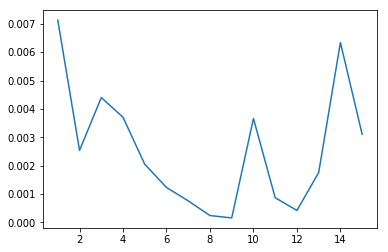

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist_epoch, hist_loss)

## Check the Accuracy

In [0]:
test_loader = DataLoader(dataset=test_data, batch_size=len(test_data))

In [31]:
with torch.no_grad():
  for num, data in enumerate(test_loader):
    imgs, labels = data
    imgs = imgs.to(device)
    labels = labels.to(device)
    
    prediction = model(imgs)
    
    correct_prediction = torch.argmax(prediction, 1) == labels
    
    accuracy = correct_prediction.float().mean()
    
  print('Accuracy: ', accuracy.item())

Accuracy:  0.99609375
